In [0]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


Automatically created module for IPython interactive environment


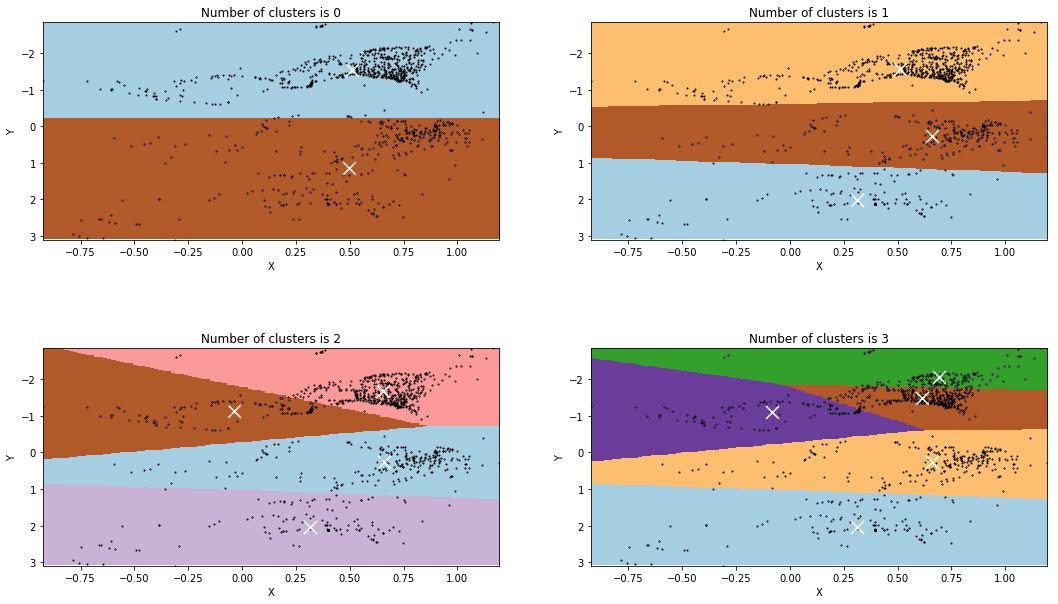

In [0]:
# Code to perform k-means clustering on 2-feature dataset
# Partially taken from sklearn docs

print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read data from csv file
data = pd.read_csv('puzzle.csv')
data.columns = ['x','y']

n_clusters = [2,3,4,5]

# Plotting the figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(18)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary by assigning a color to each
x_min, x_max = data.x.min(), data.x.max()
y_min, y_max = data.y.min(), data.y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Loop for different number of clusters
for index, clusters in enumerate(n_clusters):
    
    kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10)
    kmeans.fit(data)

    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) # Obtain labels for each point in mesh
    Z = Z.reshape(xx.shape) # Put the result into a color plot
    centroids = kmeans.cluster_centers_
    
    # Subplot
    ax = fig.add_subplot(len(n_clusters)/2,2,index+1)
    ax.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
    ax.plot(data.x, data.y, 'k.', markersize=2)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10) # Plot the centroid as a white X
    ax.set(title = 'Number of clusters is '+str(index), ylabel = 'Y', xlabel = 'X')
    ax.set(xlim = {x_min, x_max}, ylim = {y_min, y_max})

fig.subplots_adjust(hspace = 0.5)
fig.show()